<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practice-Cleaning/EDA---Car-Dataset" data-toc-modified-id="Practice-Cleaning/EDA---Car-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practice Cleaning/EDA - Car Dataset</a></span><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Obtain/Load-Data" data-toc-modified-id="Obtain/Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Obtain/Load Data</a></span></li><li><span><a href="#Scrub-the-Data" data-toc-modified-id="Scrub-the-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scrub the Data</a></span></li><li><span><a href="#How-should-we-deal-with-categorical-features?" data-toc-modified-id="How-should-we-deal-with-categorical-features?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How should we deal with categorical features?</a></span></li><li><span><a href="#EDA---Visualizing-the-Data" data-toc-modified-id="EDA---Visualizing-the-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>EDA - Visualizing the Data</a></span></li><li><span><a href="#Checking-Assumptions" data-toc-modified-id="Checking-Assumptions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Checking Assumptions</a></span></li></ul></li></ul></div>

# Practice Cleaning/EDA - Car Dataset 

## Load Libraries 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

plt.style.use('ggplot')

In [3]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Obtain/Load Data
* Get and research the data 
* Load into notebook with Pandas 
* View basic info and summary stats

In [4]:
df = pd.read_csv("cars.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Scrub the Data
* Do we have missing values? 
* Do we need to change any of our dtypes? 
* How about the column names? 
* Should we drop any columns? 
* Are there duplicates? Missing or Null values? 
* Check for outliers. 

In [7]:
df = df.rename(columns={'Engine Fuel Type': 'fuel_type', 'Engine HP': 'EHP',
                       'Engine Cylinders': 'cylinders'})

In [8]:
df.shape

(11914, 16)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(715, 16)


In [10]:
df.count()

Make                 11914
Model                11914
Year                 11914
fuel_type            11911
EHP                  11845
cylinders            11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11199 non-null object
Model                11199 non-null object
Year                 11199 non-null int64
fuel_type            11196 non-null object
EHP                  11130 non-null float64
cylinders            11169 non-null float64
Transmission Type    11199 non-null object
Driven_Wheels        11199 non-null object
Number of Doors      11193 non-null float64
Market Category      7823 non-null object
Vehicle Size         11199 non-null object
Vehicle Style        11199 non-null object
highway MPG          11199 non-null int64
city mpg             11199 non-null int64
Popularity           11199 non-null int64
MSRP                 11199 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [13]:
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
fuel_type               3
EHP                    69
cylinders              30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [14]:
df = df.dropna()
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
fuel_type            0
EHP                  0
cylinders            0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 16 columns):
Make                 7735 non-null object
Model                7735 non-null object
Year                 7735 non-null int64
fuel_type            7735 non-null object
EHP                  7735 non-null float64
cylinders            7735 non-null float64
Transmission Type    7735 non-null object
Driven_Wheels        7735 non-null object
Number of Doors      7735 non-null float64
Market Category      7735 non-null object
Vehicle Size         7735 non-null object
Vehicle Style        7735 non-null object
highway MPG          7735 non-null int64
city mpg             7735 non-null int64
Popularity           7735 non-null int64
MSRP                 7735 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.0+ MB


## EDA - Visualizing the Data 
* matplotlib - https://matplotlib.org/faq/howto_faq.html
* seaborn - https://seaborn.pydata.org/tutorial.html

Text(0.5, 0, 'Make')

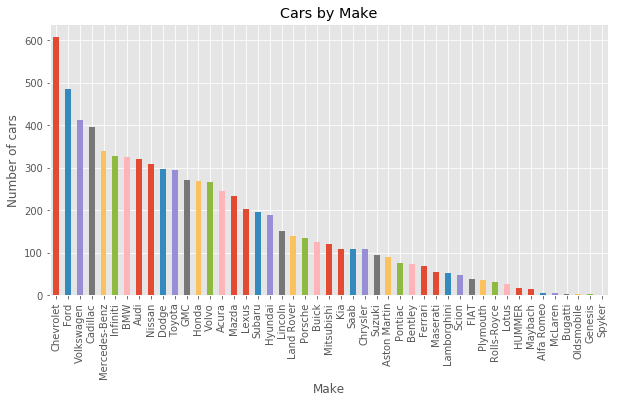

In [16]:
df['Make'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Cars by Make')
plt.ylabel('Number of cars')
plt.xlabel('Make')


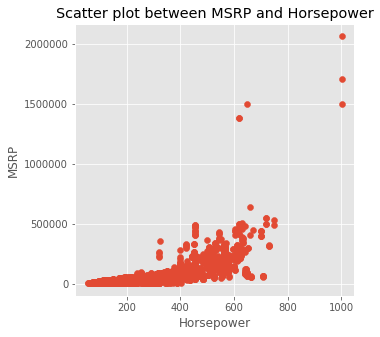

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['EHP'], df['MSRP'])
plt.title('Scatter plot between MSRP and Horsepower')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MSRP')
plt.show()

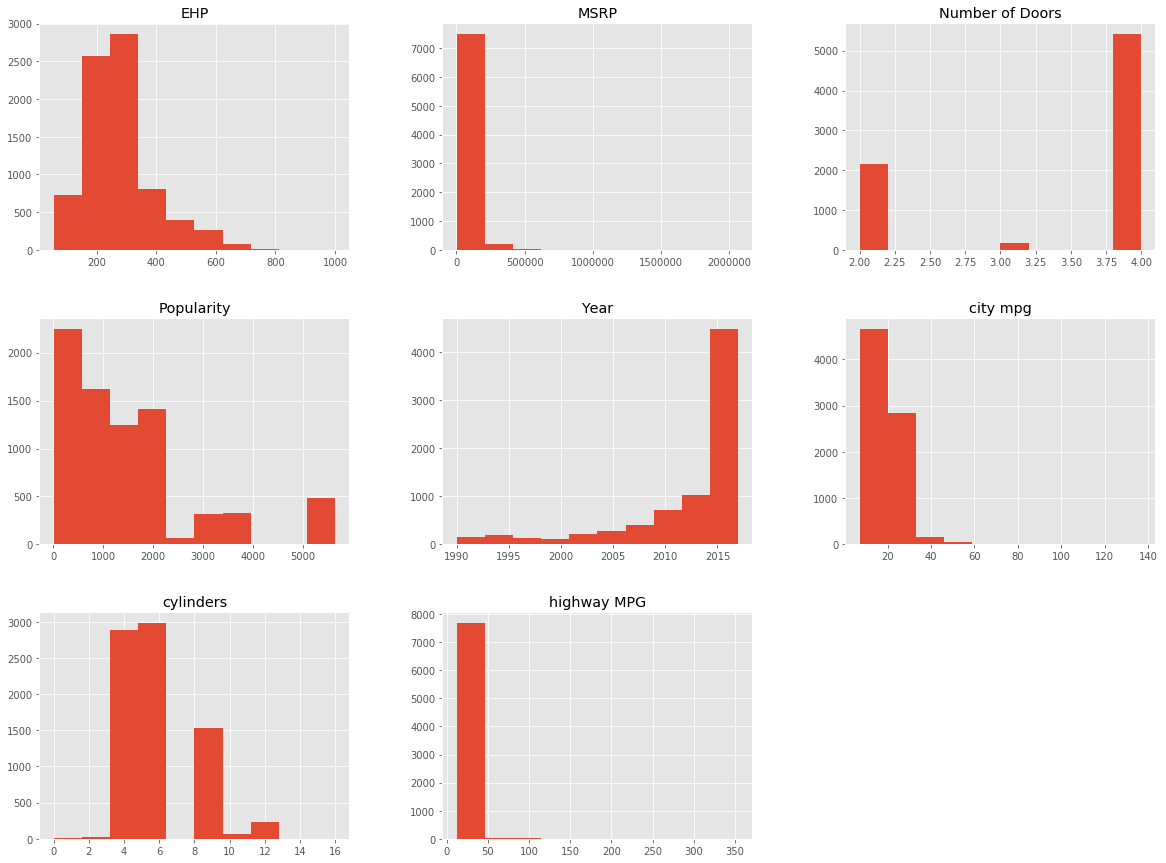

In [18]:
df.hist(figsize=(20,15));

## How should we deal with categorical features? 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 46 columns):
Year                                                      7735 non-null int64
fuel_type                                                 7735 non-null object
cylinders                                                 7735 non-null float64
Transmission Type                                         7735 non-null object
Driven_Wheels                                             7735 non-null object
Number of Doors                                           7735 non-null float64
Vehicle Size                                              7735 non-null object
Vehicle Style                                             7735 non-null object
highway MPG                                               7735 non-null int64
city mpg                                                  7735 non-null int64
Popularity                                                7735 non-null int64
MSRP                     

In [19]:
df.nunique() #take a look at unique values 

Make                   47
Model                 713
Year                   28
fuel_type               8
EHP                   327
cylinders               9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        70
Vehicle Size            3
Vehicle Style          16
highway MPG            44
city mpg               50
Popularity             47
MSRP                 4644
dtype: int64

In [22]:
drop_vars = ['Make', 'Model', 'EHP', 'Market Category']
df.drop(columns=drop_vars, axis=1, inplace=True)


In [23]:
df.head()

,Year,fuel_type,cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [26]:
cat_feats = ['Year', 'fuel_type', 'cylinders', 'Transmission Type',
            'Driven_Wheels', 'Number of Doors', 'Vehicle Size', 'Vehicle Style']

In [28]:
dummy = pd.get_dummies(df[cat_feats], drop_first=True)


In [29]:
df = pd.concat([df, dummy], axis = 1)
df.head()

,Year,fuel_type,cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,...,0,0,1,0,0,0,0,0,0,0
1,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,...,1,0,0,0,0,0,0,0,0,0
2,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,...,0,0,1,0,0,0,0,0,0,0
3,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,...,0,0,1,0,0,0,0,0,0,0
4,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,...,1,0,0,0,0,0,0,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 46 columns):
Year                                                      7735 non-null int64
fuel_type                                                 7735 non-null object
cylinders                                                 7735 non-null float64
Transmission Type                                         7735 non-null object
Driven_Wheels                                             7735 non-null object
Number of Doors                                           7735 non-null float64
Vehicle Size                                              7735 non-null object
Vehicle Style                                             7735 non-null object
highway MPG                                               7735 non-null int64
city mpg                                                  7735 non-null int64
Popularity                                                7735 non-null int64
MSRP                     

## Checking Assumptions 
Initially we can only check for the assumptions of linearity Why? 

* Linearity 
* Multicolinearity 

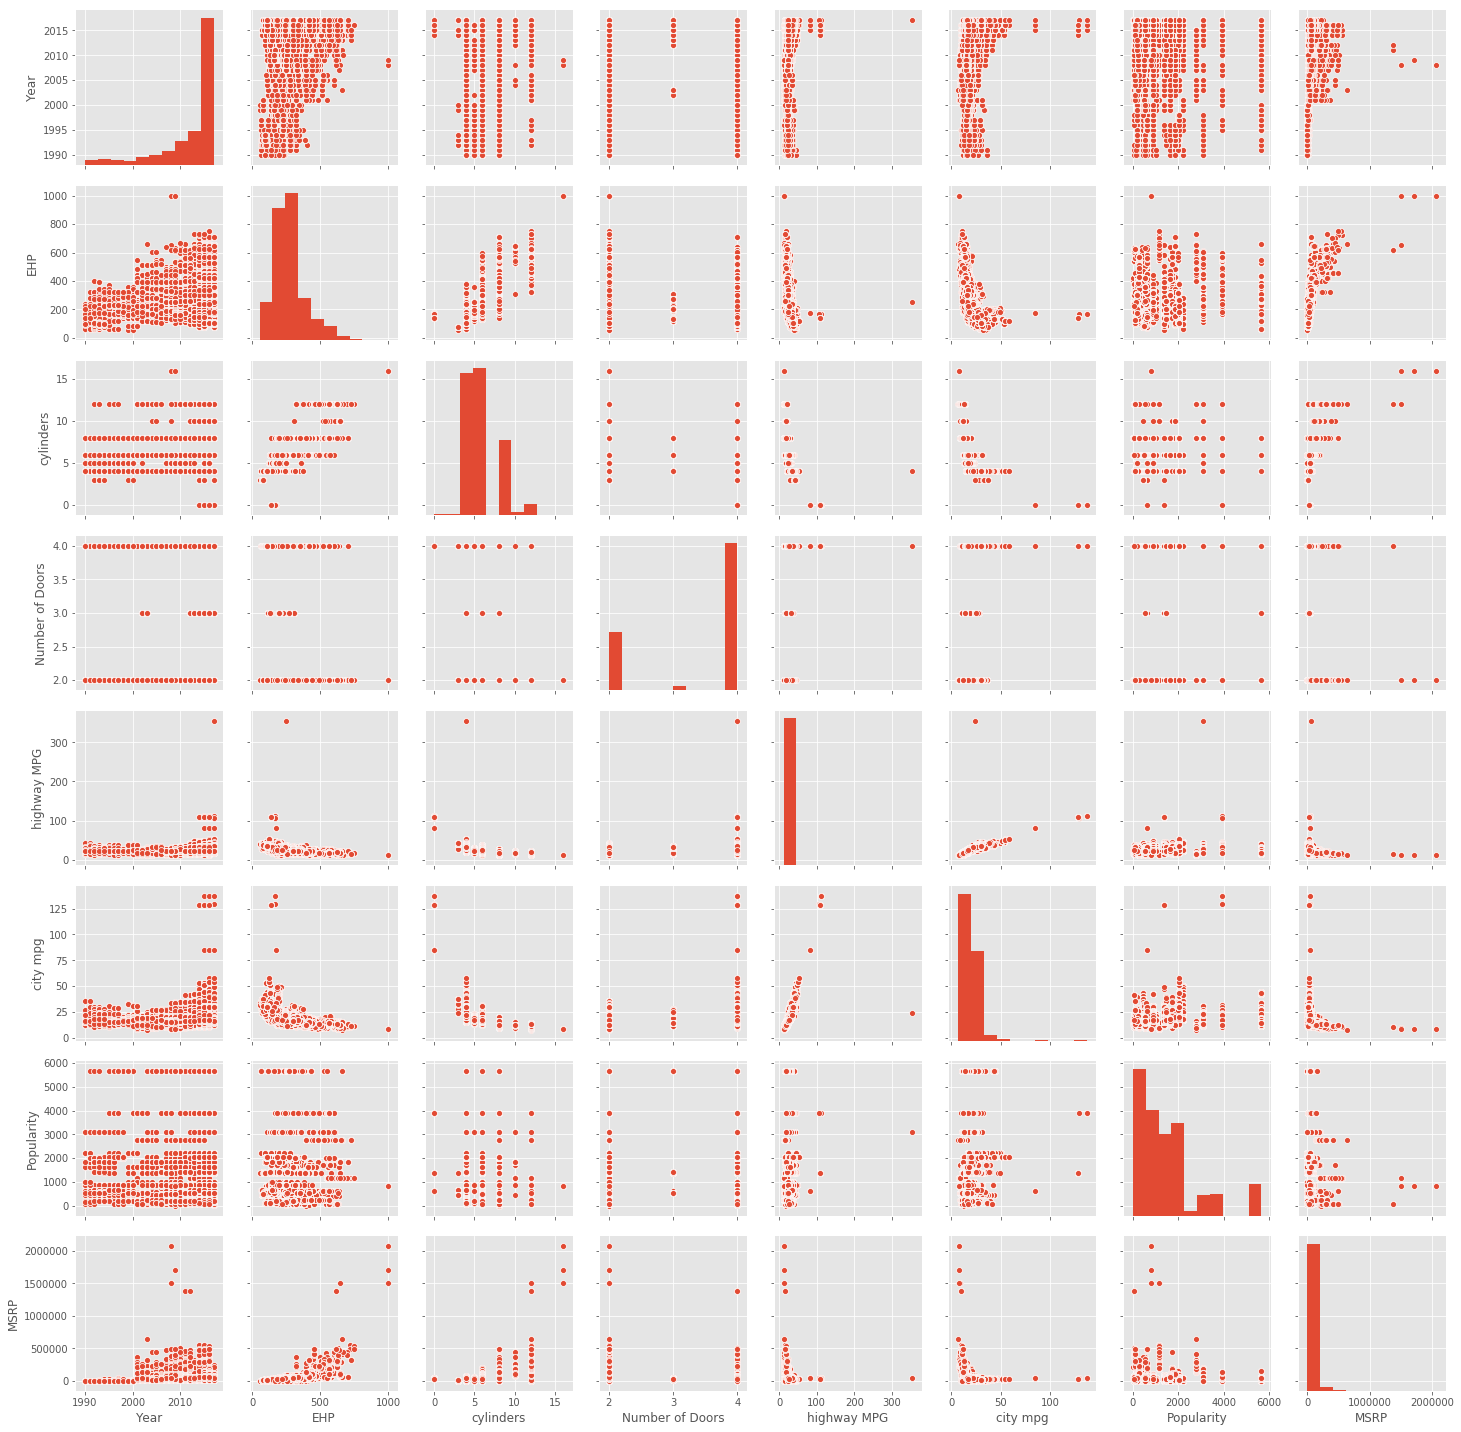

In [21]:
import seaborn as sb 
sb.pairplot(df)

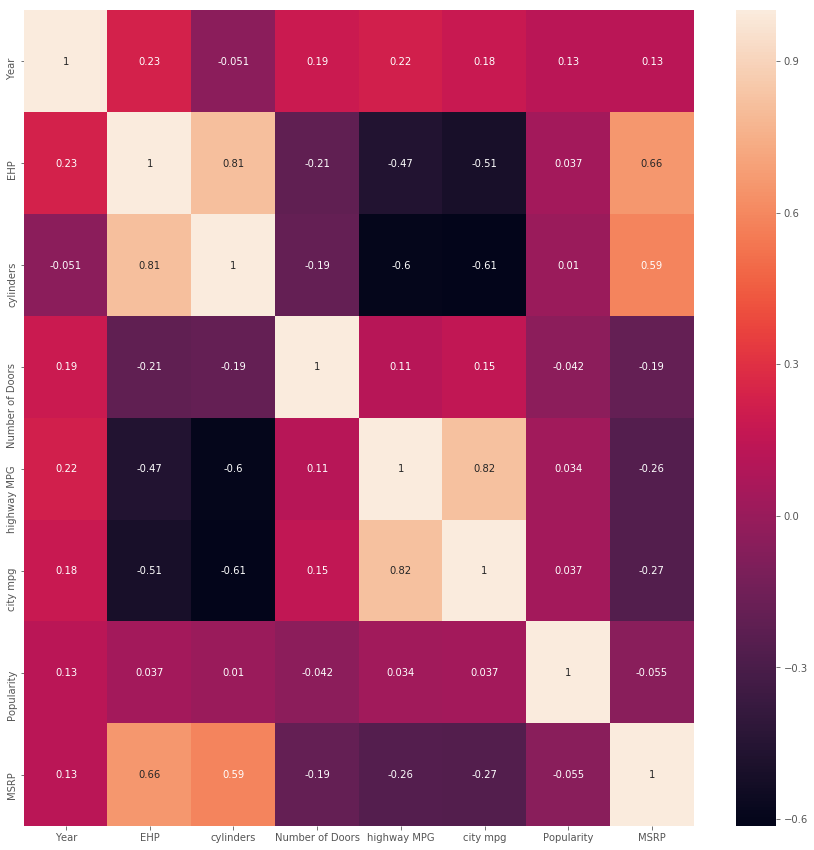

In [21]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(),annot=True);

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df